In [294]:
print('nb setup done!')

nb setup done!


In [295]:
import pandas as pd
import json

# Load JSON data
file_path = "/content/drive/MyDrive/Colab Notebooks/vertex_A1/dataset/Combined file.xlsx - Sheet1.json"  # Update if needed
investors = pd.read_json(file_path)

# Display first few rows
investors.head()


,Name,Website,Global_HQ,Countries,Stage,Overview,Type,Industry,Cheque_range,Linkedin_Company,Email,Linkedin_Personal,Twitter
0,01 Ventures,https://www.01ventures.com/,Netherlands,"UK,Netherlands","Pre-seed, Idea, Prototype/MVP, Seed",We invest in deep tech innovations including s...,VC,Information Technology & Services,$250K - $2M,,,,
1,1 4 All Group,https://1-4-all.group/,United Arab Emirates,"DRC Congo,Ethiopia,Kenya,South Africa,Brazil,C...","Pre-seed, Seed, Series+",We invest in all 6 economic sectors: Financial...,Family office,"Biotech, IoT, SaaS, Consumer, Energy, Fintech,...",$100K - $14M,,,,
2,10D,https://www.10d.vc/,Israel,Israel,"Pre-seed, Idea, Prototype/MVP, Seed",We invest in Israeli and Israeli-related excep...,VC,Information Technology & Services,$500K - $5M,,,,
3,10K Ventures,https://www.10kventures.co/,Germany,"Kenya,Nigeria,Brazil,Colombia,Mexico,India,Ind...","Pre-seed, Idea, Prototype/MVP, Seed",We invest in early stage startups and funds gl...,Family office,Sector Agnostic,$100K - $200K,,,,
4,10x Founders,https://www.10xfounders.com/,Germany,"Germany,Austria,Switzerland,France,UK,Poland,C...","Pre-seed, Idea, Prototype/MVP, Seed",We invest in the most ambitious tech founders ...,VC,Information Technology & Services,$100K - $3M,,,,


In [296]:
investors.shape

(2572, 13)

# EDA ANALYSIS

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter

In [298]:
# Check data types and missing values
print(investors.info())

# Summary statistics for numerical columns (if any)
print(investors.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               2572 non-null   object
 1   Website            2572 non-null   object
 2   Global_HQ          2572 non-null   object
 3   Countries          2572 non-null   object
 4   Stage              2572 non-null   object
 5   Overview           2572 non-null   object
 6   Type               2572 non-null   object
 7   Industry           2572 non-null   object
 8   Cheque_range       2572 non-null   object
 9   Linkedin_Company   2572 non-null   object
 10  Email              2572 non-null   object
 11  Linkedin_Personal  2572 non-null   object
 12  Twitter            2572 non-null   object
dtypes: object(13)
memory usage: 261.3+ KB
None
                Name Website      Global_HQ Countries  \
count           2572    2572           2572      2572   
unique          2499    20

In [299]:
# Calculate missing values
missing_values = investors.isnull().sum() / len(investors) * 100
print("Missing Values (%):\n", missing_values)

Missing Values (%):
 Name                 0.0
Website              0.0
Global_HQ            0.0
Countries            0.0
Stage                0.0
Overview             0.0
Type                 0.0
Industry             0.0
Cheque_range         0.0
Linkedin_Company     0.0
Email                0.0
Linkedin_Personal    0.0
Twitter              0.0
dtype: float64


In [300]:
investors.drop(columns=['Linkedin_Company', 'Email', 'Linkedin_Personal', 'Twitter'], inplace=True)

In [301]:
investors.shape

(2572, 9)

In [302]:
investors

,Name,Website,Global_HQ,Countries,Stage,Overview,Type,Industry,Cheque_range
0,01 Ventures,https://www.01ventures.com/,Netherlands,"UK,Netherlands","Pre-seed, Idea, Prototype/MVP, Seed",We invest in deep tech innovations including s...,VC,Information Technology & Services,$250K - $2M
1,1 4 All Group,https://1-4-all.group/,United Arab Emirates,"DRC Congo,Ethiopia,Kenya,South Africa,Brazil,C...","Pre-seed, Seed, Series+",We invest in all 6 economic sectors: Financial...,Family office,"Biotech, IoT, SaaS, Consumer, Energy, Fintech,...",$100K - $14M
2,10D,https://www.10d.vc/,Israel,Israel,"Pre-seed, Idea, Prototype/MVP, Seed",We invest in Israeli and Israeli-related excep...,VC,Information Technology & Services,$500K - $5M
3,10K Ventures,https://www.10kventures.co/,Germany,"Kenya,Nigeria,Brazil,Colombia,Mexico,India,Ind...","Pre-seed, Idea, Prototype/MVP, Seed",We invest in early stage startups and funds gl...,Family office,Sector Agnostic,$100K - $200K
4,10x Founders,https://www.10xfounders.com/,Germany,"Germany,Austria,Switzerland,France,UK,Poland,C...","Pre-seed, Idea, Prototype/MVP, Seed",We invest in the most ambitious tech founders ...,VC,Information Technology & Services,$100K - $3M
...,...,...,...,...,...,...,...,...,...
2567,Zaheer Memon\n,,India,Global,"Pre-seed, Seed\n","Functioning as a Legal Consultant, Zaheer Memo...",Solo Angel,"Fintech, SaaS, Media",$250K - $1M
2568,Zak Islam,http://www.linktr.ee,Australia,Global,"Pre-seed, Seed, Series+",,Solo Angel,Information Technology & Services,$250K - $2M
2569,Zane Lackey,http://www.signalsciences.com,United States,Global,"Pre-seed, Seed, Series+",,Solo Angel,Information Technology & Services,$500K - $10M
2570,Zishaan Hayath\n,,India,Global,"Pre-seed, Seed\n",Zishaan Hayath is a prominent entrepreneur and...,Solo Angel,"SaaS, Edtech",$100K - $300K


In [303]:
# Extract min and max investment values
def clean_cheque_range(cheque):
    if pd.isna(cheque):
        return np.nan, np.nan
    amounts = cheque.replace('$', '').split(' - ')
    convert = lambda x: float(x.replace('K', '000').replace('M', '000000')) if isinstance(x, str) else x
    try:
        min_val = convert(amounts[0])
        max_val = convert(amounts[1]) if len(amounts) > 1 else min_val
        return min_val, max_val
    except:
        return np.nan, np.nan

# Split into min and max columns
investors[['Cheque_min', 'Cheque_max']] = investors['Cheque_range'].apply(
    lambda x: pd.Series(clean_cheque_range(x))
)

In [304]:
investors

,Name,Website,Global_HQ,Countries,Stage,Overview,Type,Industry,Cheque_range,Cheque_min,Cheque_max
0,01 Ventures,https://www.01ventures.com/,Netherlands,"UK,Netherlands","Pre-seed, Idea, Prototype/MVP, Seed",We invest in deep tech innovations including s...,VC,Information Technology & Services,$250K - $2M,250000.0,2000000.0
1,1 4 All Group,https://1-4-all.group/,United Arab Emirates,"DRC Congo,Ethiopia,Kenya,South Africa,Brazil,C...","Pre-seed, Seed, Series+",We invest in all 6 economic sectors: Financial...,Family office,"Biotech, IoT, SaaS, Consumer, Energy, Fintech,...",$100K - $14M,100000.0,14000000.0
2,10D,https://www.10d.vc/,Israel,Israel,"Pre-seed, Idea, Prototype/MVP, Seed",We invest in Israeli and Israeli-related excep...,VC,Information Technology & Services,$500K - $5M,500000.0,5000000.0
3,10K Ventures,https://www.10kventures.co/,Germany,"Kenya,Nigeria,Brazil,Colombia,Mexico,India,Ind...","Pre-seed, Idea, Prototype/MVP, Seed",We invest in early stage startups and funds gl...,Family office,Sector Agnostic,$100K - $200K,100000.0,200000.0
4,10x Founders,https://www.10xfounders.com/,Germany,"Germany,Austria,Switzerland,France,UK,Poland,C...","Pre-seed, Idea, Prototype/MVP, Seed",We invest in the most ambitious tech founders ...,VC,Information Technology & Services,$100K - $3M,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...
2567,Zaheer Memon\n,,India,Global,"Pre-seed, Seed\n","Functioning as a Legal Consultant, Zaheer Memo...",Solo Angel,"Fintech, SaaS, Media",$250K - $1M,250000.0,1000000.0
2568,Zak Islam,http://www.linktr.ee,Australia,Global,"Pre-seed, Seed, Series+",,Solo Angel,Information Technology & Services,$250K - $2M,250000.0,2000000.0
2569,Zane Lackey,http://www.signalsciences.com,United States,Global,"Pre-seed, Seed, Series+",,Solo Angel,Information Technology & Services,$500K - $10M,500000.0,10000000.0
2570,Zishaan Hayath\n,,India,Global,"Pre-seed, Seed\n",Zishaan Hayath is a prominent entrepreneur and...,Solo Angel,"SaaS, Edtech",$100K - $300K,100000.0,300000.0


In [305]:
investors.shape

(2572, 11)

## Catogorical Analysis

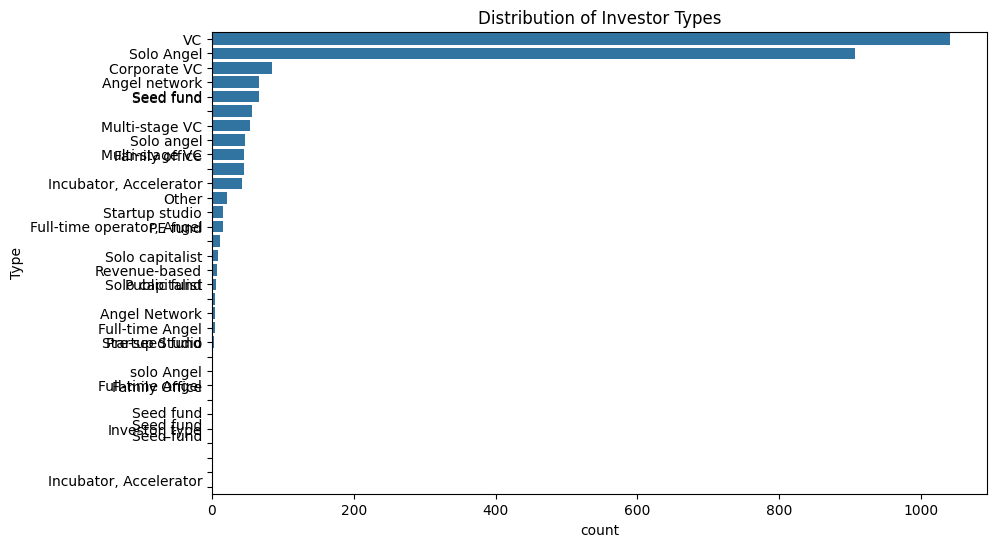

In [306]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Type', data=investors, order=investors['Type'].value_counts().index)
plt.title('Distribution of Investor Types')
plt.show()

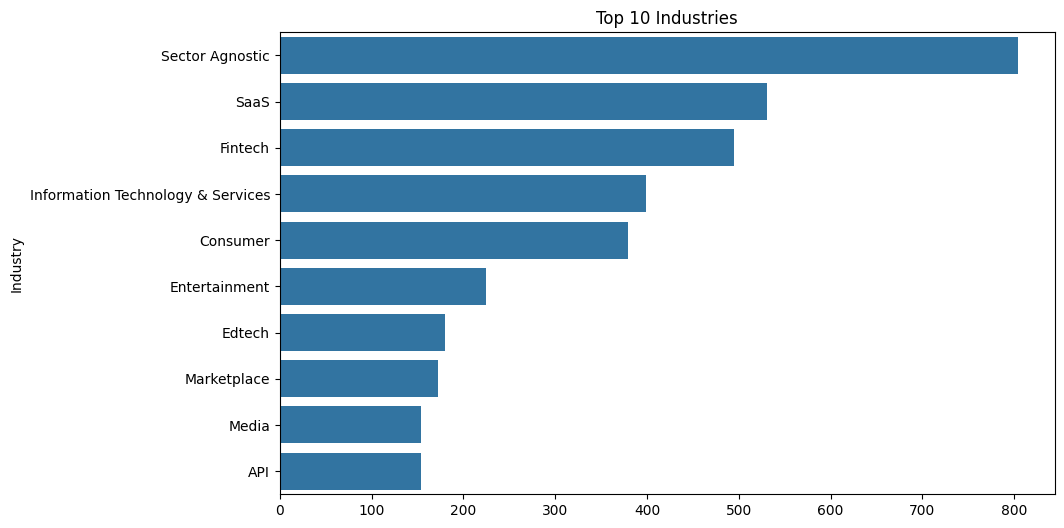

In [307]:
# Split industries and count frequencies
industries = investors['Industry'].str.split(',').explode().str.strip()
industry_counts = industries.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index)
plt.title('Top 10 Industries')
plt.show()

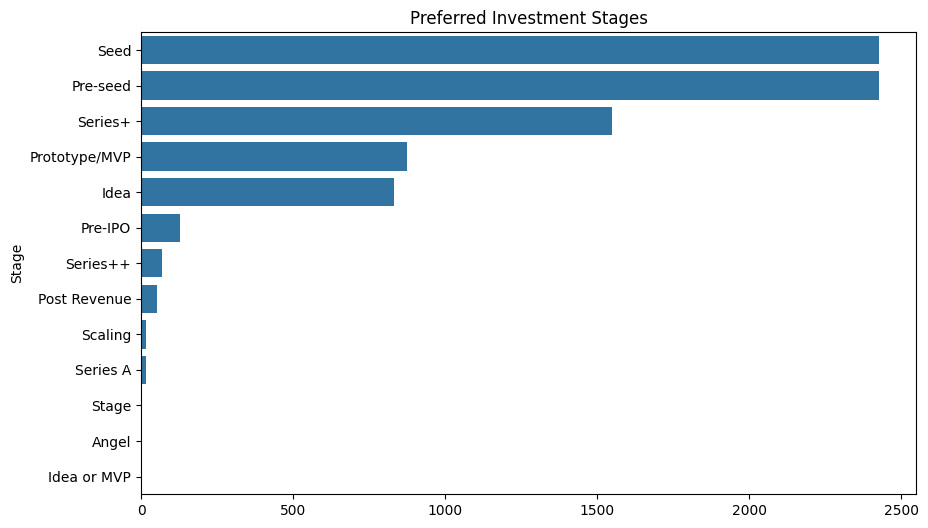

In [308]:
# Investment Stages

stages = investors['Stage'].str.split(',').explode().str.strip()
stage_counts = stages.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=stage_counts.values, y=stage_counts.index)
plt.title('Preferred Investment Stages')
plt.show()

## Geographical Analysis

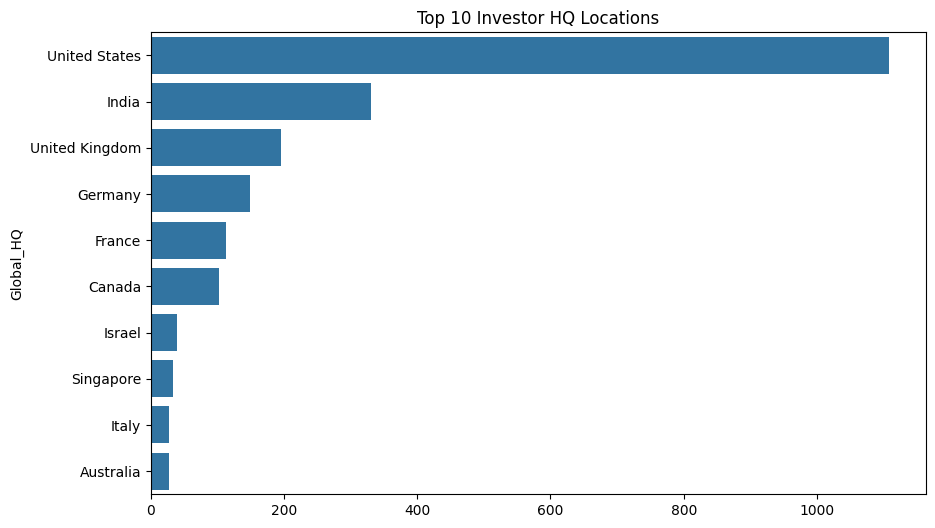

In [309]:
# Global Headquatere Distribution
hq_counts = investors['Global_HQ'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=hq_counts.values, y=hq_counts.index)
plt.title('Top 10 Investor HQ Locations')
plt.show()

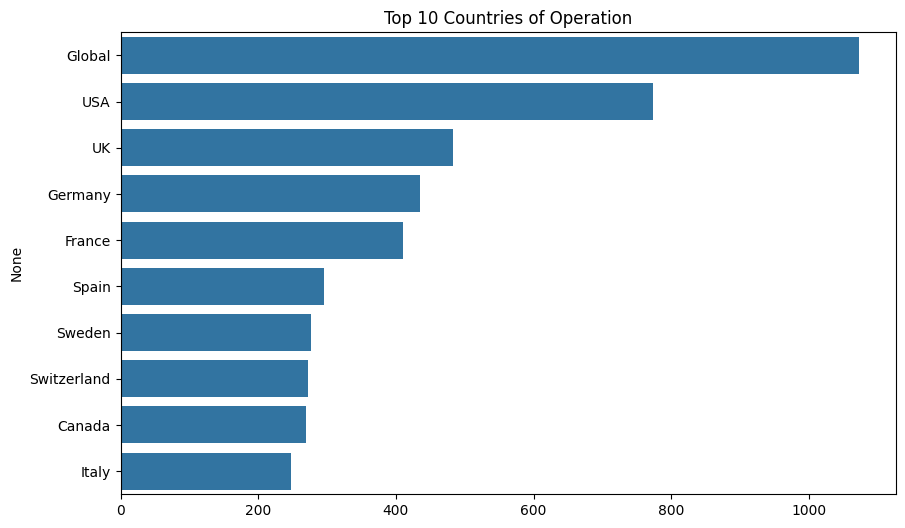

In [310]:
# Operation Countries
countries = investors['Countries'].str.split(',').explode().str.strip()
country_counts = pd.Series(Counter(countries)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index)
plt.title('Top 10 Countries of Operation')
plt.show()

## Investment Range Analysis

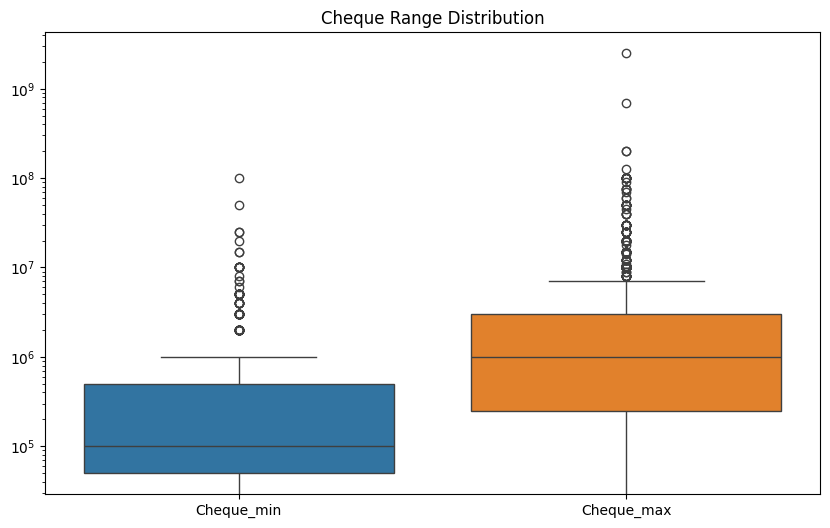

In [311]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=investors[['Cheque_min', 'Cheque_max']].dropna())
plt.title('Cheque Range Distribution')
plt.yscale('log')  # Use log scale for better visualization
plt.show()

# Take Aways

* most investors are VCs.
* Top Industries are SaaS, Fintech, B2B, and Information Technology.
* Seed and pre Seeds are preferred investment stages.
* Majority of HQ are located in USA fllowed by India, UK, Germany, France and Canada.
* Typical investments range from 50K to 5M

In [312]:
investors

,Name,Website,Global_HQ,Countries,Stage,Overview,Type,Industry,Cheque_range,Cheque_min,Cheque_max
0,01 Ventures,https://www.01ventures.com/,Netherlands,"UK,Netherlands","Pre-seed, Idea, Prototype/MVP, Seed",We invest in deep tech innovations including s...,VC,Information Technology & Services,$250K - $2M,250000.0,2000000.0
1,1 4 All Group,https://1-4-all.group/,United Arab Emirates,"DRC Congo,Ethiopia,Kenya,South Africa,Brazil,C...","Pre-seed, Seed, Series+",We invest in all 6 economic sectors: Financial...,Family office,"Biotech, IoT, SaaS, Consumer, Energy, Fintech,...",$100K - $14M,100000.0,14000000.0
2,10D,https://www.10d.vc/,Israel,Israel,"Pre-seed, Idea, Prototype/MVP, Seed",We invest in Israeli and Israeli-related excep...,VC,Information Technology & Services,$500K - $5M,500000.0,5000000.0
3,10K Ventures,https://www.10kventures.co/,Germany,"Kenya,Nigeria,Brazil,Colombia,Mexico,India,Ind...","Pre-seed, Idea, Prototype/MVP, Seed",We invest in early stage startups and funds gl...,Family office,Sector Agnostic,$100K - $200K,100000.0,200000.0
4,10x Founders,https://www.10xfounders.com/,Germany,"Germany,Austria,Switzerland,France,UK,Poland,C...","Pre-seed, Idea, Prototype/MVP, Seed",We invest in the most ambitious tech founders ...,VC,Information Technology & Services,$100K - $3M,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...
2567,Zaheer Memon\n,,India,Global,"Pre-seed, Seed\n","Functioning as a Legal Consultant, Zaheer Memo...",Solo Angel,"Fintech, SaaS, Media",$250K - $1M,250000.0,1000000.0
2568,Zak Islam,http://www.linktr.ee,Australia,Global,"Pre-seed, Seed, Series+",,Solo Angel,Information Technology & Services,$250K - $2M,250000.0,2000000.0
2569,Zane Lackey,http://www.signalsciences.com,United States,Global,"Pre-seed, Seed, Series+",,Solo Angel,Information Technology & Services,$500K - $10M,500000.0,10000000.0
2570,Zishaan Hayath\n,,India,Global,"Pre-seed, Seed\n",Zishaan Hayath is a prominent entrepreneur and...,Solo Angel,"SaaS, Edtech",$100K - $300K,100000.0,300000.0


# Data Cleaning and Preprocessing

In [313]:
file_path = "/content/drive/MyDrive/Colab Notebooks/vertex_A1/dataset/Combined file.xlsx - Sheet1.json"  # Update if needed
df = pd.read_json(file_path)

In [314]:
# Convert "USA" → "United States", "UK" → "United Kingdom", etc.
country_mapping = {
    'USA': 'United States',
    'UK': 'United Kingdom',
    'UAE': 'United Arab Emirates'
}
df['Countries'] = df['Countries'].replace(country_mapping, regex=True)


In [315]:
# Clean Cheque Ranges
import re
def parse_cheque_range(text):
    text = str(text)
    matches = re.findall(r'\$?([\d\.]+)([KM]?)', text, re.IGNORECASE)
    amounts = []
    for value, suffix in matches:
        num = float(value)
        if suffix.upper() == 'K':
            num *= 1000
        elif suffix.upper() == 'M':
            num *= 1_000_000
        amounts.append(int(num))
    return {
        'min': min(amounts) if amounts else 0,
        'max': max(amounts) if amounts else 0
    }

# Apply parsing
cheque_data = df['Cheque_range'].apply(parse_cheque_range).apply(pd.Series)
df = pd.concat([df, cheque_data.rename(columns={'min':'Cheque_min', 'max':'Cheque_max'})], axis=1)

In [316]:
import re

# Define industry mapping to standard categories
industry_mapping = {
    'IT': ['information technology', 'software', 'saas'],
    'Fintech': ['fintech', 'banking', 'finance'],
    'Healthcare': ['biotech', 'healthcare', 'medtech'],
    'IoT': ['iot', 'embedded'],
    'Edtech': ['edtech', 'education'],
    'Consumer': ['consumer', 'retail'],
    'Energy': ['energy', 'renewable'],
    'Media': ['media', 'advertising'],
    'Sector Agnostic': ['sector agnostic']
}

# Function to categorize industries
def categorize_industry(industry_str):
    if not isinstance(industry_str, str):
        return 'Other'

    industry_str = industry_str.lower()
    categories = set()

    for category, keywords in industry_mapping.items():
        for keyword in keywords:
            if re.search(rf'\b{keyword}\b', industry_str):
                categories.add(category)

    return ', '.join(categories) if categories else 'Other'

# Apply cleaning directly to df
df['Cleaned_Industry'] = df['Industry'].apply(categorize_industry)



In [317]:
# Dropping cheque_range and Industry cols
# Drop the 'Cheque_range' and 'Industry' columns
df.drop(columns=['Cheque_range', 'Industry', 'Email', 'Linkedin_Personal', 'Twitter', 'Linkedin_Company'], inplace=True)



In [318]:
df['Overview'][100]

'We invest in startups operating in Australia, New Zealand, South East Asia, and China.\n\nArtesian trusts in math, not magic. We recognize there are multiple paths to startup success. Capital-lite startups exiting to corporates at <$250M are as important to our investment strategy as $1B+ unicorns targeting world domination.\n \nArtesian invests in software and hardware startups with an overweight exposure (~50% of total FUM) in 4 key sectors: Agrifood, Clean Energy, MedTech, and AI/Robotics. We also provide our Venture Capital as a Service platform to corporations, industry groups, family offices, and government organizations.\n\nAlthough Artesian is the region’s most active early-stage VC investor (>500 startup investments), we are equally active in late-stage VC investments as any of our traditional VC peers.'

In [319]:
# Preprocessing the Overview section

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Pehle stopwords ko download kar lein (Agar pehle se nahi kiya hai)
nltk.download('stopwords')
nltk.download('punkt')

# Single function for full preprocessing
def clean_text(text):
    if not isinstance(text, str):  # Agar NaN ya non-string value ho toh handle karna
        return ""

    text = text.lower()  # Lowercase conversion
    text = re.sub(r'\d+', '', text)  # Numbers remove karna
    text = text.translate(str.maketrans("", "", string.punctuation))  # Punctuation remove karna
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Stopwords hatana
    return " ".join(tokens)  # Tokens ko wapas string me convert karna

# Apply function to DataFrame
df['Cleaned_Overview'] = df['Overview'].astype(str).apply(clean_text)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [320]:
# Dropping the Overview section
df.drop(columns=['Overview'], inplace=True)


In [321]:
# Missing Values of Stage cols
print(df['Stage'].isnull().sum())

0


In [322]:
# Frequency count of Stage cols
print(df['Stage'].value_counts())

Stage
Pre-seed, Seed, Series+                         1005
Pre-seed, Idea, Prototype/MVP, Seed              386
Pre-seed, Idea, Prototype/MVP, Seed, Series+     317
Pre-seed, Seed\n                                 191
Pre-seed, Seed                                   119
                                                ... 
Seed, Prototype/MVP, Post Revenue, Pre-seed        1
Prototype/MVP, Pre-seed, Post Revenue, Seed        1
Seed,Scaling,Series+,Prototype/MVP                 1
Pre-seed, Prototype/MVP                            1
Seed, Prototype/MVP, Post Revenue                  1
Name: count, Length: 97, dtype: int64


In [323]:
# Removing Inconsistency
df['Stage'] = df['Stage'].str.lower().str.strip()


In [325]:
# Rename columns
df.rename(columns={'Cleaned_Industry': 'Industry', 'Cleaned_Overview': 'Overview'}, inplace=True)

In [327]:
# Save current dataset as CleanedData
CleanedData = df.copy()

# Remove specified columns
InvestorScoreMatchingData = CleanedData.drop(columns=['Website', 'Global_HQ', 'Overview'])

In [329]:
CleanedData

,Name,Website,Global_HQ,Countries,Stage,Type,Cheque_min,Cheque_max,Industry,Overview
0,01 Ventures,https://www.01ventures.com/,Netherlands,"United Kingdom,Netherlands","pre-seed, idea, prototype/mvp, seed",VC,250000,2000000,IT,invest deep tech innovations including softwar...
1,1 4 All Group,https://1-4-all.group/,United Arab Emirates,"DRC Congo,Ethiopia,Kenya,South Africa,Brazil,C...","pre-seed, seed, series+",Family office,100000,14000000,"Energy, IoT, IT, Healthcare, Consumer, Fintech...",invest economic sectors financial fintech etc ...
2,10D,https://www.10d.vc/,Israel,Israel,"pre-seed, idea, prototype/mvp, seed",VC,500000,5000000,IT,invest israeli israelirelated exceptional entr...
3,10K Ventures,https://www.10kventures.co/,Germany,"Kenya,Nigeria,Brazil,Colombia,Mexico,India,Ind...","pre-seed, idea, prototype/mvp, seed",Family office,100000,200000,Sector Agnostic,invest early stage startups funds globally hyp...
4,10x Founders,https://www.10xfounders.com/,Germany,"Germany,Austria,Switzerland,France,United King...","pre-seed, idea, prototype/mvp, seed",VC,100000,3000000,IT,invest ambitious tech founders preseed across ...
...,...,...,...,...,...,...,...,...,...,...
2567,Zaheer Memon\n,,India,Global,"pre-seed, seed",Solo Angel,250000,1000000,"IT, Media, Fintech",functioning legal consultant zaheer memon spec...
2568,Zak Islam,http://www.linktr.ee,Australia,Global,"pre-seed, seed, series+",Solo Angel,250000,2000000,IT,
2569,Zane Lackey,http://www.signalsciences.com,United States,Global,"pre-seed, seed, series+",Solo Angel,500000,10000000,IT,
2570,Zishaan Hayath\n,,India,Global,"pre-seed, seed",Solo Angel,100000,300000,"IT, Edtech",zishaan hayath prominent entrepreneur angel in...


In [330]:
# Export CleanedData
CleanedData.to_csv("CleanedData.csv", index=False)

# Export InvestorScoreMatchingData
InvestorScoreMatchingData.to_csv("InvestorScoreMatchingData.csv", index=False)
